In [467]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

import keras
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras import backend as K

In [210]:
train_dir =  'data/train'
test_dir = 'data/test'
val_dir = 'data/val'

## EDA

### Normal Chest

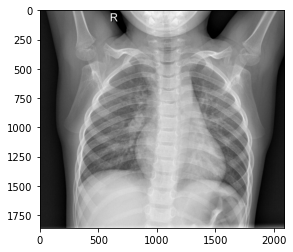

In [211]:
img_normal = load_img('data/train/NORMAL/IM-0115-0001.jpeg')
plt.imshow(img_normal)
plt.show()

In [212]:
data = img_to_array(img_normal)

In [213]:
data.shape

(1858, 2090, 3)

### Pneumonia Chest

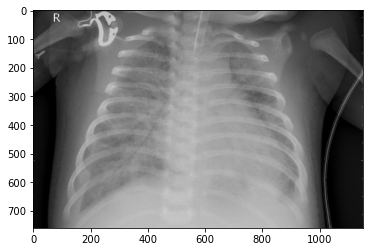

In [214]:
img_pneumonia = load_img('data/train/PNEUMONIA/person1000_bacteria_2931.jpeg')
plt.imshow(img_pneumonia)
plt.show()

In [215]:
img_pneumonia.size

(1152, 760)

Train data is imbalanced. This means we need data augmentation on training set.

### Data for Model Fitting

Train set has imbalanced data = needs augmentation

In [420]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range = 0.3,
                                  brightness_range=(0.9,1),
                                  zoom_range =0.2,
                                  validation_split=0.1)

test_datagen = ImageDataGenerator(rescale=1./255)

In [459]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size= 32,
                                                    subset='training',
                                                    class_mode = 'binary'
                                                    )

validation_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    subset='validation',
                                                    class_mode = 'binary'
                                                    )


test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode = 'binary'
                                                  )

Found 4695 images belonging to 2 classes.
Found 521 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


(32, 150, 150, 3)


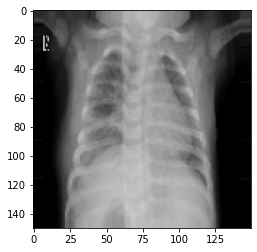

(32, 150, 150, 3)


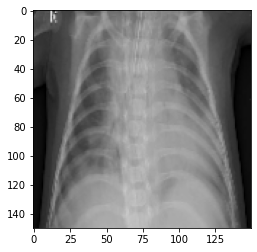

(32, 150, 150, 3)


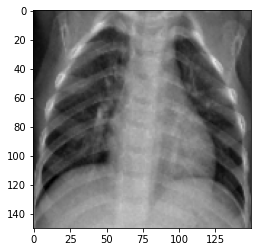

(32, 150, 150, 3)


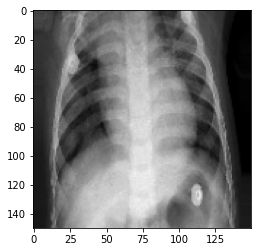

(32, 150, 150, 3)


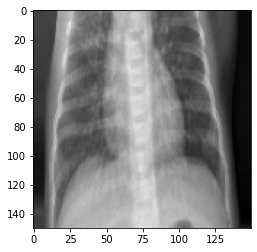

(32, 150, 150, 3)


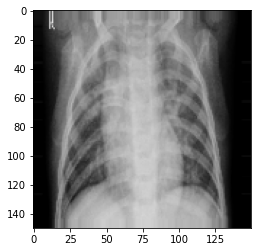

(32, 150, 150, 3)


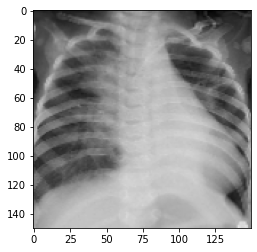

(32, 150, 150, 3)


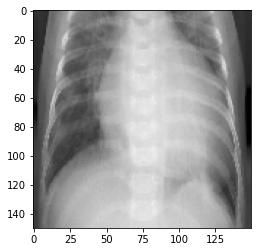

(32, 150, 150, 3)


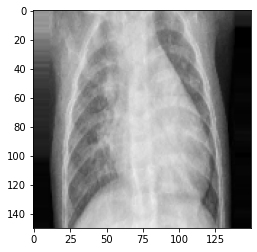

(32, 150, 150, 3)


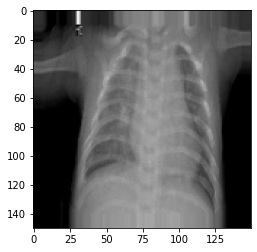

(32, 150, 150, 3)


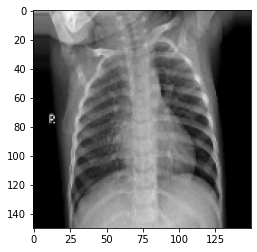

(32, 150, 150, 3)


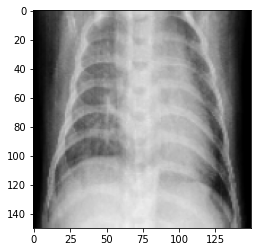

(32, 150, 150, 3)


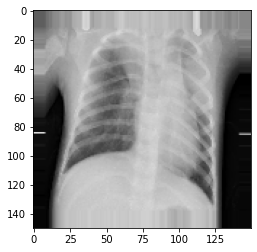

(32, 150, 150, 3)


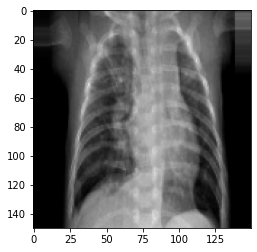

(32, 150, 150, 3)


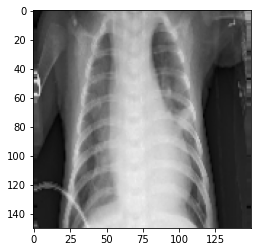

In [460]:
for _ in range(15):
    img, label = train_generator.next()
    print(img.shape)   #  (32,150,150,3)
    plt.imshow(img[0])
    plt.show()

### Baseline Model

In [475]:
model = Sequential()

In [476]:
#model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150,150,3)))
#model.add(MaxPooling2D(pool_size = (2, 2)))
#model.add(Flatten())
model.add(Input(shape = (150, 150,3)))
model.add(Flatten())
model.add(Dense(activation = 'relu', units = 128))
model.add(Dense(activation = 'sigmoid', units = 2))

In [477]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_30 (Flatten)         (None, 67500)             0         
_________________________________________________________________
dense_80 (Dense)             (None, 128)               8640128   
_________________________________________________________________
dense_81 (Dense)             (None, 2)                 258       
Total params: 8,640,386
Trainable params: 8,640,386
Non-trainable params: 0
_________________________________________________________________


In [478]:
model.compile(optimizer= 'adam',
              loss = 'binary_crossentropy',
             metrics=['accuracy', 'Recall']) 

In [479]:
model1 = model.fit_generator(
    train_generator,
    steps_per_epoch= 10,
    epochs=10,
    validation_data=validation_generator,
    validation_steps= 10)

Epoch 1/10


ValueError: in user code:

    C:\Users\Paul\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\Paul\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Paul\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Paul\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Paul\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Paul\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\Paul\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:748 train_step
        loss = self.compiled_loss(
    C:\Users\Paul\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\Paul\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Users\Paul\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\Paul\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Paul\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\losses.py:1605 binary_crossentropy
        K.binary_crossentropy(y_true, y_pred, from_logits=from_logits), axis=-1)
    C:\Users\Paul\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Paul\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\backend.py:4823 binary_crossentropy
        return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    C:\Users\Paul\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Paul\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\ops\nn_impl.py:173 sigmoid_cross_entropy_with_logits
        raise ValueError("logits and labels must have the same shape (%s vs %s)" %

    ValueError: logits and labels must have the same shape ((None, 2) vs (None, 1))


In [429]:
def plot_cnn(model):
    plt.plot(model.history['accuracy'])
    plt.plot(model.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()
    plt.plot(model.history['recall'])
    plt.plot(model.history['val_recall'])
    plt.title('Model Recall')
    plt.ylabel('Recall')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()
    plt.plot(model.history['val_loss'])
    plt.plot(model.history['loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()

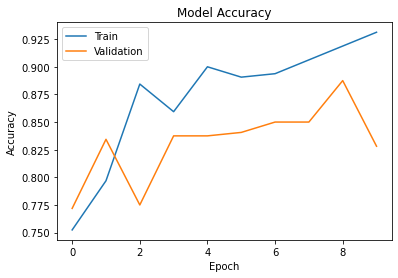

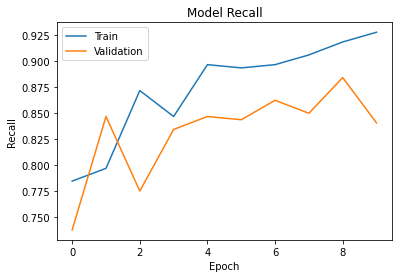

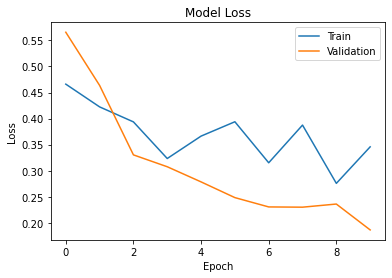

In [430]:
plot_cnn(model1)

In [431]:
test_accu = model.evaluate(test_generator)

20/20 [==============================] - 6s 289ms/step - loss: 0.6255 - accuracy: 0.7484 - recall: 0.7548


In [432]:
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 74.83974099159241 %


In [433]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

In [434]:
y_pred.shape

(624,)

In [435]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [436]:
cmat = confusion_matrix(test_generator.classes, y_pred)

In [437]:
cmd = ConfusionMatrixDisplay(cmat, display_labels=['Normal', 'Pneumonia'])

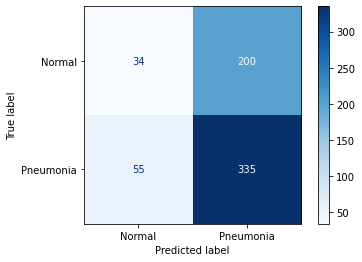

In [438]:
cmd.plot(cmap='Blues')

### Model 2.0 

In [439]:
model_2 = Sequential()

In [440]:
model_2.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150,150,3)))
model_2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_2.add(MaxPooling2D(pool_size = (2, 2)))
model_2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_2.add(MaxPooling2D(pool_size = (2, 2)))
model_2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_2.add(MaxPooling2D(pool_size = (2, 2)))
model_2.add(Flatten())
model_2.add(Dense(activation = 'relu', units = 128))
model_2.add(Dense(activation = 'sigmoid', units = 2))

In [441]:
model_2.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_92 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 37, 37, 128)     

In [442]:
model_2.compile(optimizer= 'adam',
              loss = 'binary_crossentropy',
             metrics=['accuracy', 'Recall']) 

In [443]:
model2 = model_2.fit_generator(
    train_generator,
    steps_per_epoch= 10,
    epochs=10,
    validation_data=validation_generator,
    validation_steps= 10)

Epoch 1/10
10/10 [==============================] - 17s 2s/step - loss: 0.6130 - accuracy: 0.7594 - recall: 0.6156 - val_loss: 0.5626 - val_accuracy: 0.7406 - val_recall: 0.7406
Epoch 2/10
10/10 [==============================] - 17s 2s/step - loss: 0.5828 - accuracy: 0.7406 - recall: 0.7406 - val_loss: 0.5619 - val_accuracy: 0.7531 - val_recall: 0.7531
Epoch 3/10
10/10 [==============================] - 17s 2s/step - loss: 0.5623 - accuracy: 0.7719 - recall: 0.7719 - val_loss: 0.5561 - val_accuracy: 0.7437 - val_recall: 0.7437
Epoch 4/10
10/10 [==============================] - 17s 2s/step - loss: 0.5670 - accuracy: 0.7469 - recall: 0.7469 - val_loss: 0.5939 - val_accuracy: 0.7250 - val_recall: 0.7250
Epoch 5/10
10/10 [==============================] - 18s 2s/step - loss: 0.5551 - accuracy: 0.7375 - recall: 0.7375 - val_loss: 0.5388 - val_accuracy: 0.7344 - val_recall: 0.7344
Epoch 6/10
10/10 [==============================] - 17s 2s/step - loss: 0.4649 - accuracy: 0.7875 - recall: 0.

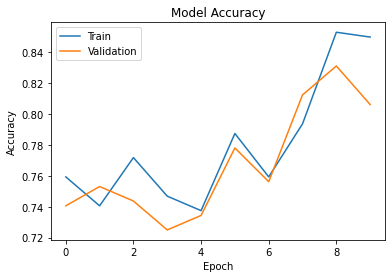

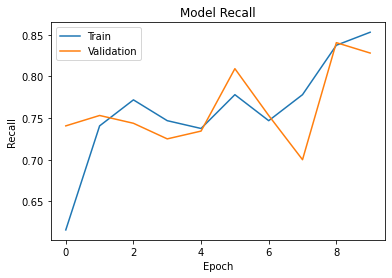

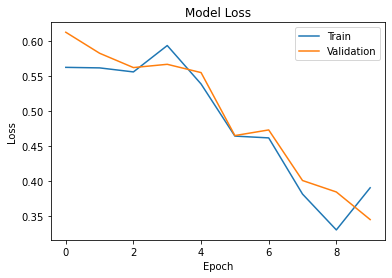

In [444]:
plot_cnn(model2)

In [445]:
test_accu = model_2.evaluate(test_generator)

20/20 [==============================] - 8s 404ms/step - loss: 0.3885 - accuracy: 0.8237 - recall: 0.8301


In [446]:
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 82.37179517745972 %


### Model 3.0

In [271]:
model_3 = Sequential()
model_3.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150,150,3)))
model_3.add(MaxPooling2D(pool_size = (2, 2)))
model_3.add(Flatten())
model_3.add(Dense(activation = 'relu', units = 128))
model_3.add(Dense(activation = 'relu', units = 128))
model_3.add(Dense(activation = 'relu', units = 128))
model_3.add(Dense(activation = 'sigmoid', units = 2))
model_3.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 37, 37, 128)     

In [272]:
model_3.compile(optimizer= 'adam',
              loss = 'binary_crossentropy',
             metrics=['accuracy', 'Recall']) 

In [273]:
model3 = model_3.fit_generator(
    train_generator,
    steps_per_epoch=5216 // 100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=16 // 16)

Epoch 1/10
52/52 [==============================] - 41s 790ms/step - loss: 0.6039 - accuracy: 0.7416 - recall: 0.7392 - val_loss: 0.8468 - val_accuracy: 0.5000 - val_recall: 0.5000
Epoch 2/10
52/52 [==============================] - 42s 804ms/step - loss: 0.5735 - accuracy: 0.7488 - recall: 0.7488 - val_loss: 0.7483 - val_accuracy: 0.5000 - val_recall: 0.5000
Epoch 3/10
52/52 [==============================] - 35s 666ms/step - loss: 0.4945 - accuracy: 0.7500 - recall: 0.7488 - val_loss: 0.7918 - val_accuracy: 0.5000 - val_recall: 0.5000
Epoch 4/10
52/52 [==============================] - 34s 649ms/step - loss: 0.4396 - accuracy: 0.7921 - recall: 0.7897 - val_loss: 0.8000 - val_accuracy: 0.8125 - val_recall: 0.8750
Epoch 5/10
52/52 [==============================] - 35s 665ms/step - loss: 0.3847 - accuracy: 0.8425 - recall: 0.8462 - val_loss: 1.2749 - val_accuracy: 0.6250 - val_recall: 0.6250
Epoch 6/10
52/52 [==============================] - 34s 649ms/step - loss: 0.3239 - accuracy: 0

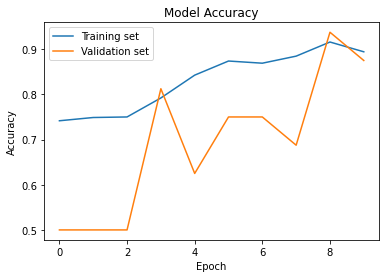

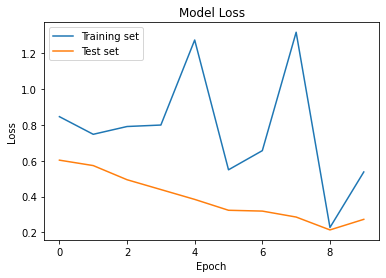

In [279]:
plot_cnn(model3)

In [280]:
test_accu = model_2.evaluate(test_generator, steps = 624)

39/39 [==============================] - 8s 194ms/step - loss: 1.4769 - accuracy: 0.7276 - recall: 0.7308


In [281]:
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 72.75640964508057 %


### Model 4.0

In [447]:
model_4 = Sequential()
model_4.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150,150,3)))
model_4.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_4.add(MaxPooling2D(pool_size = (2, 2)))
model_4.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_4.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_4.add(MaxPooling2D(pool_size = (2, 2)))
model_4.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_4.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_4.add(MaxPooling2D(pool_size = (2, 2)))
model_4.add(Flatten())
model_4.add(Dense(activation = 'relu', units = 128))
model_4.add(Dense(activation = 'relu', units = 128))
model_4.add(Dense(activation = 'relu', units = 128))
model_4.add(Dense(activation = 'sigmoid', units = 2))
model_4.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_98 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 75, 75, 64)        18496     
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 37, 37, 128)     

In [448]:
model_4.compile(optimizer= 'adam',
              loss = 'binary_crossentropy',
             metrics=['accuracy', 'Recall']) 

In [449]:
model4 = model_4.fit_generator(
    train_generator,
    steps_per_epoch=10,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=10)

Epoch 1/10
10/10 [==============================] - 18s 2s/step - loss: 0.6763 - accuracy: 0.6750 - recall: 0.6281 - val_loss: 0.6155 - val_accuracy: 0.7594 - val_recall: 0.7594
Epoch 2/10
10/10 [==============================] - 18s 2s/step - loss: 0.6121 - accuracy: 0.7375 - recall: 0.7375 - val_loss: 0.5925 - val_accuracy: 0.7469 - val_recall: 0.7469
Epoch 3/10
10/10 [==============================] - 18s 2s/step - loss: 0.5625 - accuracy: 0.7625 - recall: 0.7625 - val_loss: 0.5744 - val_accuracy: 0.7375 - val_recall: 0.7375
Epoch 4/10
10/10 [==============================] - 19s 2s/step - loss: 0.5701 - accuracy: 0.7500 - recall: 0.7500 - val_loss: 0.5653 - val_accuracy: 0.7406 - val_recall: 0.7406
Epoch 5/10
10/10 [==============================] - 22s 2s/step - loss: 0.5896 - accuracy: 0.7219 - recall: 0.7219 - val_loss: 0.6283 - val_accuracy: 0.7250 - val_recall: 0.7250
Epoch 6/10
10/10 [==============================] - 20s 2s/step - loss: 0.6064 - accuracy: 0.7188 - recall: 0.

In [451]:
test_accu = model_2.evaluate(test_generator)

20/20 [==============================] - 10s 491ms/step - loss: 0.3885 - accuracy: 0.8237 - recall: 0.8301


In [452]:
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 82.37179517745972 %
